In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

###  Importing Libraries

In [74]:
import random
random.seed(0)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import keras
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

### Import data

In [75]:
data=h5py.File("Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5",'r')

In [76]:
for key in data.keys():
    print(key)

X_test
X_train
X_val
y_test
y_train
y_val


There are 6 dataset in the folder 

### Describing tha data in each dataset

In [77]:
X_train=np.array(data['X_train'].value)
X_test=np.array(data['X_test'].value)
X_val=np.array(data['X_val'].value)

y_train=np.array(data['y_train'].value)
y_test=np.array(data['y_test'].value)
y_val=np.array(data['y_val'].value)

print("Shape of X training set: ",X_train.shape)
print("Shape of X validation set: ",X_val.shape)
print("Shape of X test set: ",X_test.shape)

print("Shape of y training set: ",y_train.shape)
print("Shape of y validation set: ",y_val.shape)
print("Shape of y test set: ",y_test.shape)

Shape of X training set:  (42000, 32, 32)
Shape of X validation set:  (60000, 32, 32)
Shape of X test set:  (18000, 32, 32)
Shape of y training set:  (42000,)
Shape of y validation set:  (60000,)
Shape of y test set:  (18000,)


We have 42000 data for training, 60000 data for validation and 18000 data for testing

### Visualizing target variable(image)

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


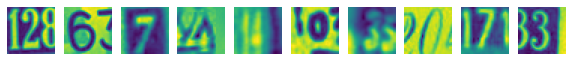

In [54]:
#printing image of training set
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(32,32))
    plt.axis('off')
    print('label for each of the below image: %s' % (y_train[0:10][i]))
plt.show()

### Reshaping the data to format (# of example, height, width, channel) - compactable to input neural network

In [84]:
X_train=X_train.reshape(X_train.shape[0],-1)
X_val=X_val.reshape(X_val.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)

### Normalizing the data

In [79]:
X_train=X_train/255
X_val=X_val/255
X_test=X_test/255
print("Mininimum value of X_train: ",np.min(X_train))
print("Mininimum value of X_test: ",np.min(X_val))
print("Maximum value of X_train: ",np.max(X_train))
print("Maximum value of X_test: ",np.max(X_val))

Mininimum value of X_train:  0.0
Mininimum value of X_test:  0.0
Maximum value of X_train:  0.9999
Maximum value of X_test:  0.9999


We have divided by 255 to normalize the image data in each dataset

In [83]:
# One Hot encoder
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)
y_val=tf.keras.utils.to_categorical(y_val,num_classes=10)
y_test=tf.keras.utils.to_categorical(y_val,num_classes=10)

### Neural network classifier

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout

def train_test_model(iteration,lr,verb=True):
    global history,c_model
    lr=lr
    iteration=iteration
    hidden_node=256
    output_nodes=10

    c_model=tf.keras.models.Sequential()
    c_model.add(Dense(hidden_node,input_shape=(1024,), activation='relu',kernel_initializer='he_normal'))#Layer1 dense layer with relu activation
    c_model.add(BatchNormalization())
    c_model.add(Dropout(0.2))
    c_model.add(Dense(hidden_node,input_shape=(1024,), activation='relu'))#Layer2 dense layer with relu activation
    c_model.add(BatchNormalization())
    c_model.add(Dense(hidden_node,input_shape=(1024,),activation='relu'))#Layer3 dense layer with relu activation
    c_model.add(Dropout(0.2))
    c_model.add(BatchNormalization())
    c_model.add(Dense(hidden_node,input_shape=(1024,), activation='sigmoid'))#Layer4 dense layer with sigmoid activation
    c_model.add(Dense(output_nodes, activation='softmax'))#softmax layer for classifier

    adam=optimizers.Adam(lr=lr)#Adam optimizer
    c_model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
    history=c_model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=iteration, verbose=1)
    return history,c_model



Four layer with categorical cross entropy loss function and accuracy score metric

In [59]:
lr = 1e-1
train_test_model(100, lr)

Epoch 1/100
1313/1313 [==============================] - 12s 8ms/step - loss: 1.9897 - accuracy: 0.2874 - val_loss: 1.7879 - val_accuracy: 0.3897
Epoch 2/100
1313/1313 [==============================] - 10s 8ms/step - loss: 1.6725 - accuracy: 0.4230 - val_loss: 2.0394 - val_accuracy: 0.3041
Epoch 3/100
1313/1313 [==============================] - 10s 8ms/step - loss: 1.7181 - accuracy: 0.4037 - val_loss: 1.8954 - val_accuracy: 0.3787
Epoch 4/100
1313/1313 [==============================] - 10s 8ms/step - loss: 1.6530 - accuracy: 0.4293 - val_loss: 1.6824 - val_accuracy: 0.4230
Epoch 5/100
1313/1313 [==============================] - 11s 8ms/step - loss: 1.6299 - accuracy: 0.4387 - val_loss: 1.4767 - val_accuracy: 0.5241
Epoch 6/100
1313/1313 [==============================] - 11s 8ms/step - loss: 1.6248 - accuracy: 0.4409 - val_loss: 1.4212 - val_accuracy: 0.5277
Epoch 7/100
1313/1313 [==============================] - 10s 8ms/step - loss: 1.5991 - accuracy: 0.4498 - val_loss: 1.4876 -

Epoch 57/100
1313/1313 [==============================] - 11s 8ms/step - loss: 1.5081 - accuracy: 0.4843 - val_loss: 1.1874 - val_accuracy: 0.6230
Epoch 58/100
1313/1313 [==============================] - 10s 8ms/step - loss: 1.5373 - accuracy: 0.4806 - val_loss: 1.2398 - val_accuracy: 0.6095
Epoch 59/100
1313/1313 [==============================] - 10s 8ms/step - loss: 1.5257 - accuracy: 0.4866 - val_loss: 1.4029 - val_accuracy: 0.5376
Epoch 60/100
1313/1313 [==============================] - 10s 7ms/step - loss: 1.5243 - accuracy: 0.4799 - val_loss: 1.2322 - val_accuracy: 0.6047
Epoch 61/100
1313/1313 [==============================] - 10s 7ms/step - loss: 1.5251 - accuracy: 0.4830 - val_loss: 1.4695 - val_accuracy: 0.5119
Epoch 62/100
1313/1313 [==============================] - 10s 7ms/step - loss: 1.5224 - accuracy: 0.4837 - val_loss: 1.2796 - val_accuracy: 0.5857
Epoch 63/100
1313/1313 [==============================] - 10s 8ms/step - loss: 1.5142 - accuracy: 0.4851 - val_loss: 1

(<tensorflow.python.keras.callbacks.History at 0x141bb6e67c0>,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x141c607eac0>)

model with around 0.48 accuracy is ache=ieved with learining rate 1e-1 and 100 apochs

### Visualization of Loss and Accuracy

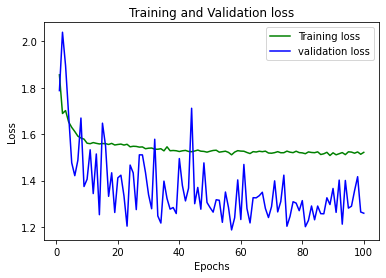

In [61]:
#Plotting loss pf model
epochs=100
loss_train = history.history['loss'][:100]
loss_val = history.history['val_loss'][:100]
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

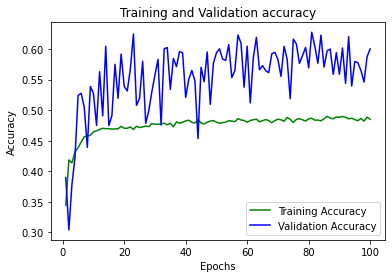

In [62]:
#Plotting accuracy pf model
acc_train = history.history['accuracy'][:100]
acc_val = history.history['val_accuracy'][:100]
epochs=100
epochs = range(1,101)
plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss saturated around 1.54 and accuracy 0.47 in training data